In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage , fcluster
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import seaborn as sns


In [22]:
data=pd.read_excel("/content/donnees_environnement_capteurs.xlsx")
data.head(5)


,INDEX,Typologie de la zone,Type de voie,Nombre de voies,Distance capteur / voie,Position capteurs,Presence d'arbres,Feuille d arbres,Morphologie urbaine,Hauteur des batiments,Distance capteur / batiment,Particularite,Trafic Routier/ vehicule leger (TMJA),Trafic Routier/ poids lourds (TMJA),Trafic Routier/ 2 roues (TMJA),emission moyenne annuelle (kg/maille/an),Donnees Cartographie
0,c1,centre ville,Rue droite,Boulevard a 3 voies de circulation et circulat...,1 a 2 m,Parking 4 roues et Arbre,Range arbres,NON en hiver,Batiments de deux cotes,R+2,1 a 2 m,pas de particuarite,14185,366,233,3242,32.400002
1,c2,centre ville,Rue droite,Boulevard a 3 voies de circulation et circulat...,1 a 2 m,Parking 4 roues,Range arbres,NON en hiver,Batiments de deux cotes,R+1,2 a 4 m,Administration,14185,366,233,3242,32.400002
2,c3,centre ville,Intersection en T,Boulevard a 3 voies de circulation et circulat...,1 a 2 m,Arbre,Range arbres,NON en hiver,Batiments de deux cotes,R+1,1 a 2 m,Feu,14185,366,233,3242,26.799999
3,c4,centre ville,Intersection en T,Boulevard a 3 voies de circulation et circulat...,1 a 2 m,Parking 4 roues,Range arbres,NON en hiver,Batiments de deux cotes,R+1,1 a 2 m,Etablissement enseignement,14185,366,233,3242,37.000000
4,c5,centre ville,Rue droite,Boulevard a 3 voies de circulation et circulat...,1 a 2 m,Parking 4 roues et Arbre,Range arbres,NON en hiver,Batiments de deux cotes,R+2,1 a 2 m,pas de particuarite,14185,366,233,3242,27.500000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   INDEX                                     97 non-null     object 
 1   Typologie de la zone                      97 non-null     object 
 2   Type de voie                              97 non-null     object 
 3   Nombre de voies                           97 non-null     object 
 4   Distance capteur / voie                   97 non-null     object 
 5   Position capteurs                         97 non-null     object 
 6   Presence d'arbres                         97 non-null     object 
 7   Feuille d arbres                          97 non-null     object 
 8   Morphologie urbaine                       97 non-null     object 
 9   Hauteur des batiments                     97 non-null     object 
 10  Distance capteur / batiment             

In [23]:
data.describe()

,Trafic Routier/ poids lourds (TMJA),Trafic Routier/ 2 roues (TMJA),emission moyenne annuelle (kg/maille/an),Donnees Cartographie
count,97.000000,97.000000,97.000000,97.000000
mean,126.824742,94.525773,2671.577320,24.958763
std,177.637037,125.879332,607.813257,6.183223
min,0.000000,0.000000,747.000000,14.400000
25%,0.000000,0.000000,2182.000000,20.700001
50%,0.000000,58.000000,2991.000000,24.500000
75%,226.000000,121.000000,3242.000000,27.799999
max,646.000000,511.000000,3604.000000,47.400002


In [24]:
data.isna().sum()

INDEX                                       0
Typologie de la zone                        0
Type de voie                                0
Nombre de voies                             0
Distance capteur / voie                     0
Position capteurs                           0
Presence d'arbres                           0
Feuille d arbres                            0
Morphologie urbaine                         0
Hauteur des batiments                       0
Distance capteur / batiment                 0
Particularite                               0
Trafic Routier/ vehicule leger (TMJA)       0
Trafic Routier/ poids lourds (TMJA)         0
Trafic Routier/  2 roues (TMJA)             0
emission moyenne annuelle (kg/maille/an)    0
Donnees Cartographie                        0
dtype: int64

In [25]:
for x in data.columns:
  if data[x].dtype==np.float64 or data[x].dtype==np.int64:
    data.fillna(data[x].mean,inplace=True)




In [26]:
  data.isna().sum()

INDEX                                       0
Typologie de la zone                        0
Type de voie                                0
Nombre de voies                             0
Distance capteur / voie                     0
Position capteurs                           0
Presence d'arbres                           0
Feuille d arbres                            0
Morphologie urbaine                         0
Hauteur des batiments                       0
Distance capteur / batiment                 0
Particularite                               0
Trafic Routier/ vehicule leger (TMJA)       0
Trafic Routier/ poids lourds (TMJA)         0
Trafic Routier/  2 roues (TMJA)             0
emission moyenne annuelle (kg/maille/an)    0
Donnees Cartographie                        0
dtype: int64

In [35]:
# FAIRE UNE COPIE DE INDEX
Index=data["INDEX"]
Index


dtype('O')

In [38]:
#encoder les variables
label_encoder=LabelEncoder()

for x in data.columns:
  if data[x].dtype=='object':
    data[x]=data[x].astype(str)
    data[x]=label_encoder.fit_transform(data[x])

data

,INDEX,Typologie de la zone,Type de voie,Nombre de voies,Distance capteur / voie,Position capteurs,Presence d'arbres,Feuille d arbres,Morphologie urbaine,Hauteur des batiments,Distance capteur / batiment,Particularite,Trafic Routier/ vehicule leger (TMJA),Trafic Routier/ poids lourds (TMJA),Trafic Routier/ 2 roues (TMJA),emission moyenne annuelle (kg/maille/an),Donnees Cartographie
0,0,2,3,0,0,7,2,1,1,3,1,11,1,366,233,3242,32.400002
1,11,2,3,0,0,4,2,1,1,2,4,1,1,366,233,3242,32.400002
2,22,2,0,0,0,0,2,1,1,2,1,4,1,366,233,3242,26.799999
3,33,2,0,0,0,4,2,1,1,2,1,3,1,366,233,3242,37.000000
4,44,2,3,0,0,7,2,1,1,3,1,11,1,366,233,3242,27.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,92,4,3,2,3,7,2,1,1,5,3,6,21,0,0,2991,26.100000
93,93,4,3,3,1,5,2,1,1,0,3,9,21,0,0,2991,27.100000
94,94,4,4,2,3,7,2,3,1,3,1,11,21,0,0,2270,19.799999
95,95,4,3,3,3,7,2,3,1,3,1,5,20,5,121,2270,23.299999


In [40]:
data=data.drop('INDEX',axis=1)
data

,Typologie de la zone,Type de voie,Nombre de voies,Distance capteur / voie,Position capteurs,Presence d'arbres,Feuille d arbres,Morphologie urbaine,Hauteur des batiments,Distance capteur / batiment,Particularite,Trafic Routier/ vehicule leger (TMJA),Trafic Routier/ poids lourds (TMJA),Trafic Routier/ 2 roues (TMJA),emission moyenne annuelle (kg/maille/an),Donnees Cartographie
0,2,3,0,0,7,2,1,1,3,1,11,1,366,233,3242,32.400002
1,2,3,0,0,4,2,1,1,2,4,1,1,366,233,3242,32.400002
2,2,0,0,0,0,2,1,1,2,1,4,1,366,233,3242,26.799999
3,2,0,0,0,4,2,1,1,2,1,3,1,366,233,3242,37.000000
4,2,3,0,0,7,2,1,1,3,1,11,1,366,233,3242,27.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,4,3,2,3,7,2,1,1,5,3,6,21,0,0,2991,26.100000
93,4,3,3,1,5,2,1,1,0,3,9,21,0,0,2991,27.100000
94,4,4,2,3,7,2,3,1,3,1,11,21,0,0,2270,19.799999
95,4,3,3,3,7,2,3,1,3,1,5,20,5,121,2270,23.299999


In [45]:
#appliquons le PCA
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

pca=PCA(n_components=2)
pca_res=pca.fit_transform(scaled_data)

pca_dataFrame=pd.DataFrame(data=pca_res,columns=["PCA1",'PCA2'])

pca_dataFrame

,PCA1,PCA2
0,2.951967,-0.137662
1,3.624581,0.525043
2,3.215423,-0.500888
3,3.545255,-0.599211
4,2.677413,0.062327
...,...,...
92,-1.275949,-0.550994
93,-0.842920,0.229517
94,-2.004107,0.752596
95,-1.395660,0.576042


<ipython-input-52-c6d471089a44>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_dataFrame["PCA1"],pca_dataFrame["PCA2"],cmap="coolwarm")


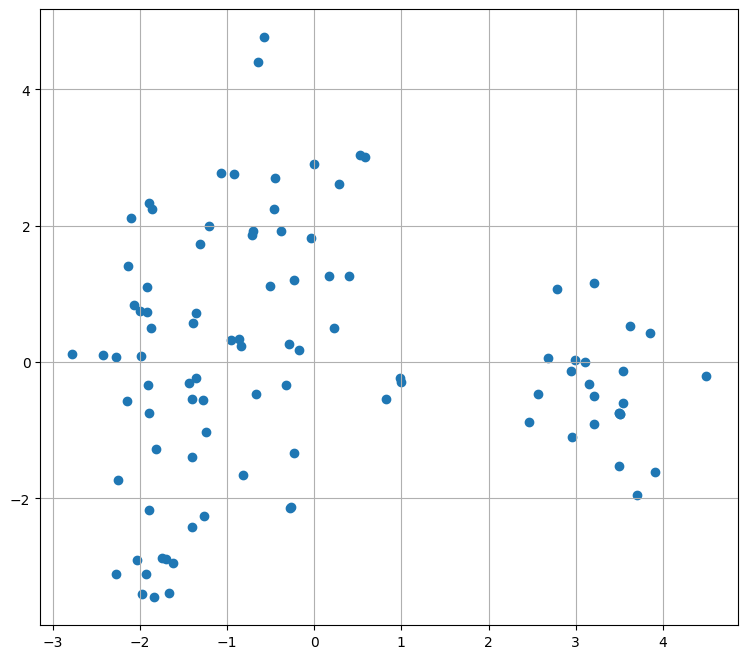

In [52]:
plt.figure(figsize=(9,8))
plt.scatter(pca_dataFrame["PCA1"],pca_dataFrame["PCA2"],cmap="coolwarm")
plt.grid(True)
plt.show()

<Axes: >

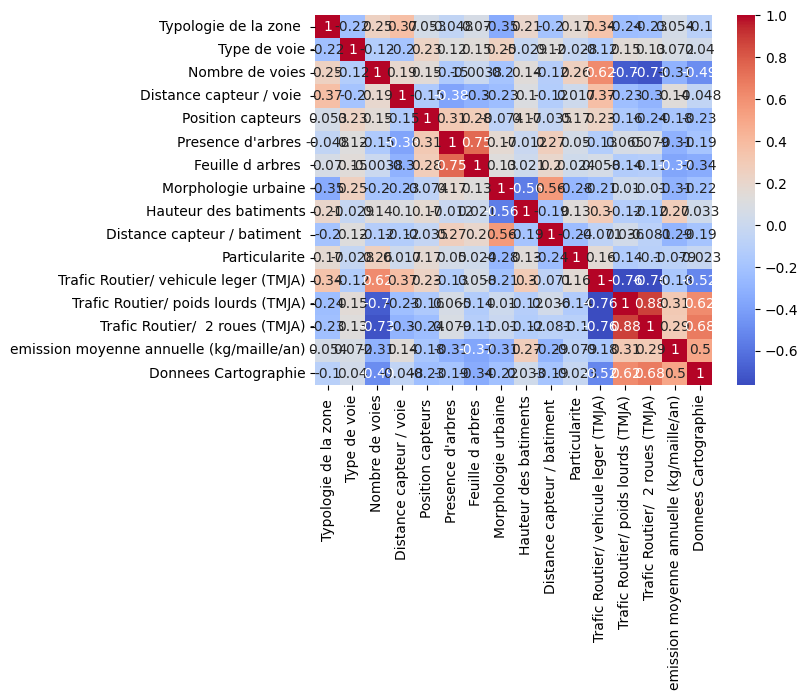

In [56]:
# on visualise la corrélation entre les variables

matrix_corr=data.corr()

sns.heatmap(matrix_corr,annot=True,cmap="coolwarm")

In [107]:
indices=np.where(matrix_corr == np.max(matrix_corr[matrix_corr != 1]))
indices = [(matrix_corr.index[x], matrix_corr.columns[y]) for x, y in zip(*indices) if x != y]

sorted(indices)[-1] # return le dernier élément avec >>> corr



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


('Typologie de la zone ', 'Distance capteur / voie ')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-81-ce23aa6a00a8>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cente[:,0],cente[:,1],cmap='coolwarm',marker='x')


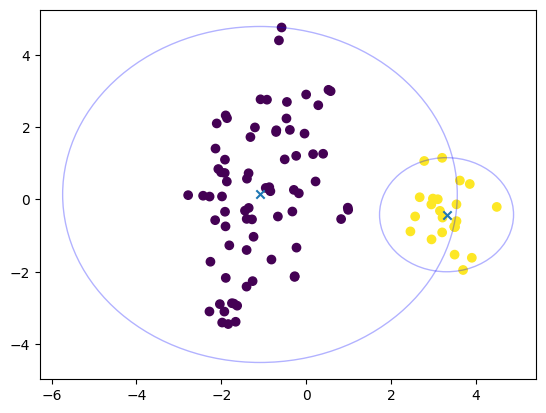

In [81]:
k=2

km=KMeans(n_clusters=k)

km.fit(pca_res)
cente=km.cluster_centers_
lab=km.labels_
plt.scatter(pca_res[:,0],pca_res[:,1],c=lab,cmap='viridis',marker='o')
plt.scatter(cente[:,0],cente[:,1],cmap='coolwarm',marker='x')
for i in range(k):
    cluster_points = pca_res[lab == i]
    radius = max(np.linalg.norm(cluster_points - cente[i], axis=1))
    circle = plt.Circle(cente[i], radius, color='b', fill=False, alpha=0.3)
    plt.gca().add_patch(circle)


plt.show()

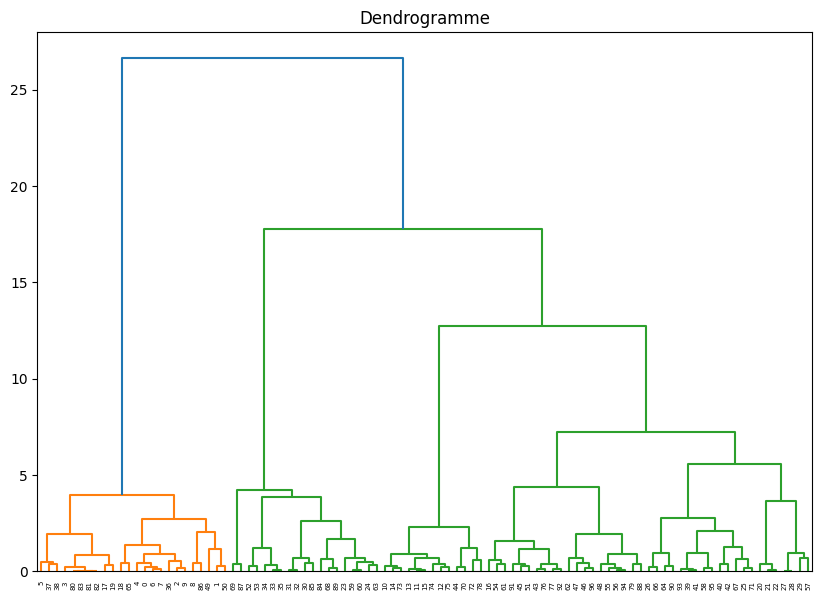

In [108]:
#CHA


Z = linkage(pca_res, 'ward')


plt.figure(figsize=(10, 7))
plt.title("Dendrogramme")
dendrogram(Z)
plt.show()




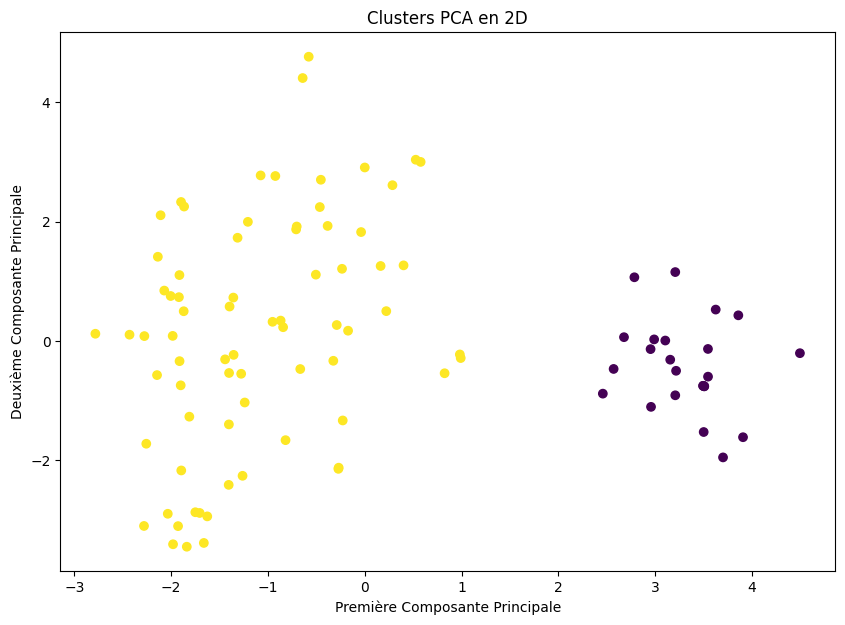

In [114]:
max_d = 20
clusters = fcluster(Z, max_d, criterion='distance')


plt.figure(figsize=(10, 7))
plt.scatter(pca_res[:, 0], pca_res[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters PCA en 2D')
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.show()

<ipython-input-125-04460a75ca0c>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_tsne[:,0],data_tsne[:,1],cmap='viridis')


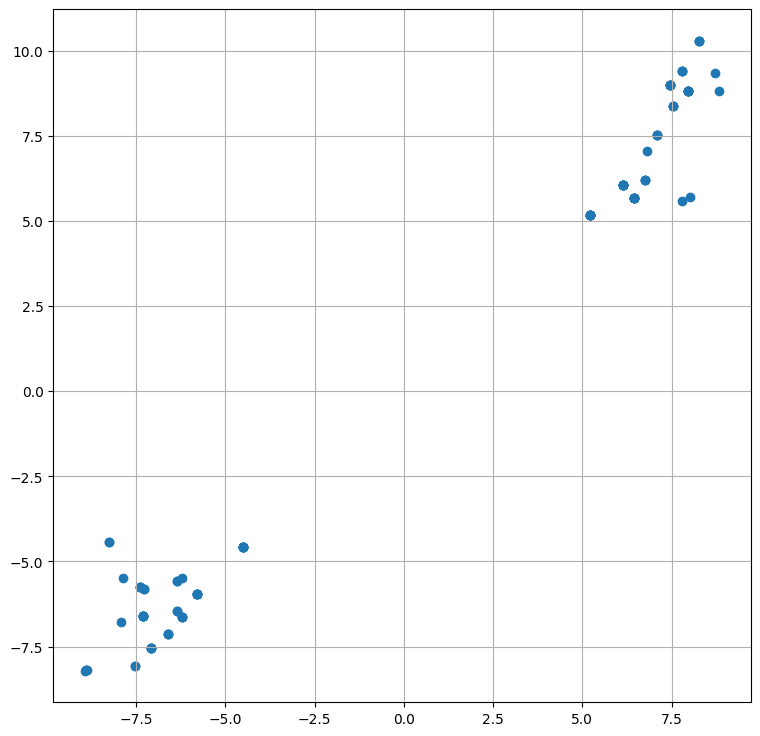

In [125]:
# appliquer le t_SNE


tsne=TSNE(n_components=2,random_state=42)

data_tsne=tsne.fit_transform(data)

plt.figure(figsize=(9,9))

plt.scatter(data_tsne[:,0],data_tsne[:,1],cmap='viridis')

plt.grid(True)
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-130-f421d607face>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(center[:,0],center[:,1],cmap='coolwarm',marker='x')


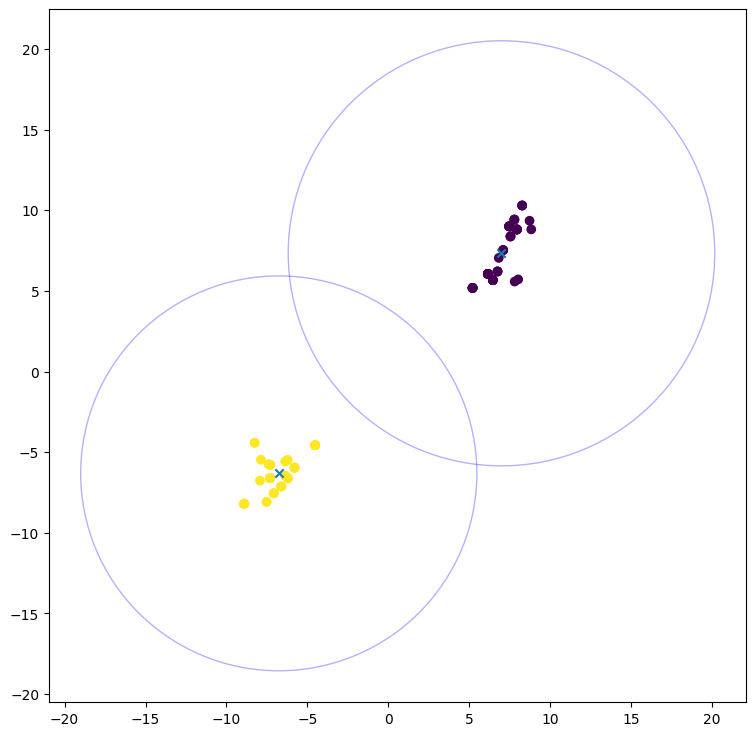

In [130]:
kmm=KMeans(n_clusters=2)

kmm.fit_transform(data_tsne)

center=kmm.cluster_centers_
labe=kmm.labels_
plt.figure(figsize=(9,9))
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=labe,cmap='viridis',marker='o')
plt.scatter(center[:,0],center[:,1],cmap='coolwarm',marker='x')
for i in range(k):
    cluster_points = data_tsne[lab == i]
    radius = max(np.linalg.norm(cluster_points - cente[i], axis=1))
    circle = plt.Circle(center[i], radius, color='b', fill=False, alpha=0.3)
    plt.gca().add_patch(circle)


plt.show()